 ## Feature Selection

 In real life applications, it's rare to have all of the features useful for building a data mining model. It's important to remove redundant or non-informative features from the dataset. First and foremost, the more the features are incorporated into the model, the more complicated the model becomes. If we're adding redundant or non-informative features to the equation, we increase the processing power demand, which very often is already pretty high. In some rare cases, the less useful features reduce the accuracy of the model (it depends on the used techniques, very often that's not the case). Nonetheless feature selection is one of the core processes, next to the data normalization and feature engineering, applied to the data prior to perfmorming the actual data mining techniques. This notebook covers the commonly used Feature Selection techniques, which are a part of the sklearn feature_selection module. Let's start by importing the modules to the nodebook.

In [ ]:
from sklearn import datasets, preprocessing, feature_selection
from itertools import compress

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset

In this excercise we will use the [Wine](https://archive.ics.uci.edu/ml/datasets/wine) dataset available in the `scikit-learn` library. After loading the dataset display its description and familiarize yourself with the interpretation of features.

In [ ]:
wine = datasets.load_wine()

print(wine.DESCR)

print('Data shape: ', wine.data.shape)

Let's prepare a dataframe for the wine dataset.

In [ ]:
wine_dataframe = pd.DataFrame(wine.data,columns = wine.feature_names)
wine_dataframe

## Removing attributes with low variance

Obviously, the features which share very similar values across the entire dataset are not going to be useful. We can remove those variables with a tool, which is called [VarianceThreshold](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold). Prior to applying this tool let's check the variance of each feature.

In [ ]:
wine_dataframe.std()**2

We can now observe the importance of normalization. Obviously, the values of the `magnesium` feature are a few orders of magnitude higher than the values of the `hue` feature. The default, most common setting of the variance threshold method gets rid of the features, which have a variance of 0 (all of the values are the same across the entire dataset). If however we wanted to apply this method with a custom threshold we need to perform some kind of normalization scheme. Let's start with standarization.

In [ ]:
#we import standarizer
from sklearn.preprocessing import StandardScaler
#initialize it
scaler = StandardScaler()
#calculate all the necessary data to perform the standarization
scaler.fit(wine_dataframe)
#apply the standarizer to the data
wine_dataframe_standarized = pd.DataFrame(scaler.transform(wine_dataframe),columns = wine.feature_names)
wine_dataframe_standarized.std()**2

In that case the custom Variance Threshold wouldn't make much sense either. After all the standarization process has normalized the variance for each of the features. Let's take a look at min-max normalzation.

In [ ]:
#we import normalizer
from sklearn.preprocessing import MinMaxScaler
#initialize it
scaler = MinMaxScaler()
#calculate all the necessary data to perform the normalization
scaler.fit(wine_dataframe)
#apply the standarizer to the data
wine_dataframe_normalized = pd.DataFrame(scaler.transform(wine_dataframe),columns = wine.feature_names)
wine_dataframe_normalized.std()**2

As you can see all of the variables have relatively low variance, but by no means niether of them have a close to zero variance. We can compare the variables by their variance, but a raw threshold should be used only for near zero or zero variance features. Here's how we can apply the tool to the data. In this example the threshold is set to 0.03, just to show how the method works. In fact, here we shouldn't remove any of the features, as the variance is way too high.

In [ ]:
from sklearn.feature_selection import VarianceThreshold
#we create a variance threshold object
sel = VarianceThreshold(threshold=0.03)
#we apply the method to the data - this method does not create a new dataframe, just a numpy array
wine_variance_removed = sel.fit_transform(wine_dataframe_normalized)
#we can create a new dataframe using the get_feature_names_out() function to get the names of the selected columns
wine_dataframe_variance_removed = pd.DataFrame(wine_variance_removed, columns = sel.get_feature_names_out())
wine_dataframe_variance_removed

We can also see, which features should be removed with the get_support() function.

In [ ]:
sel.get_support()

## Select k best features

You probably saw that we can rank the features using the variance. In fact it's a common practice to rank the features. If it is necesseary to reduce complexity of the model, we can pick the variables, which have the best scores. Before we go to the code, let's go trough the ranking functions. The ranking functions can be divided into two classes:
  - unsupervised - the ranking score is calculated with use of the statistical information:
       - Variance - it is used to remove features, which do not yield any information
       - Correlation - it is used to remove features, which are redundant

  - supervised - in this case, the ranking score is related to the usefulness of the feature in the context of discovering the target values (e.g. how useful would be that feature if we applied linear regression to discover the target value):

     - Chi-squared score ([chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2))
     - ANOVA score ([f_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif))
     - Information Gain ([mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif))
     - Linear Regression f-value ([f_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression))

We have already investiaged the Variance. Let's take a look at correlation. Calculating correlation is as simple as calling the [corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) function on the pandas dataframe. 

In [ ]:
wine_dataframe_normalized.corr()

We can see the correlation values, however making sense of the table by hand would take a lot of effort. Let's help ourselves with some formatting. Here we will use a [seaborn](https://seaborn.pydata.org/) library - it is a visualization tool based on the matplotlib. Usually you import seabron with an sns alias.


In [ ]:
import seaborn as sns
#we are importing pyplot, just to change the size of the picture
import matplotlib.pyplot as plt

The correlation heatmap is drawn with the (who would've guessed) [heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function. This drawing can be specified in detail, but the simpliest use just takes the correlation values as the first argument of the function (here we also use the [colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) argument, which is optional).

In [ ]:
#this just sets the size of a picture
plt.figure(figsize=(10,8))
#here we draw the heatmap
sns.heatmap(wine_dataframe_normalized.corr(), cmap='YlOrRd')

Notice, that the correlation values don't change if we do not apply normalization schema.

In [ ]:
#this just sets the size of a picture
plt.figure(figsize=(10,8))
#here we draw the heatmap
sns.heatmap(wine_dataframe.corr(), cmap='YlOrRd')

We observe a large number of strong correlations, but the features `total_phenols` and `flavanoids` stick out as very strongly correlated and thus are very likely redundant. Whenever we encounter two variables, which are very strongly correlated we can get rid of one of them. It is also useful to add the target values to the correlation analysis, we usually pick the feature, which has a stronger correlation with the target value.

Let's go to the `supervised` feature scores. We can calculate the absolute values of the scores directly with use of the specific implementation ([chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2), [f_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif) ,[mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif), [f_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression)). The function either returns the score for each feature or the set of scores and [p-values](https://en.wikipedia.org/wiki/P-value). We are not going to use p-values here.

In [ ]:
from sklearn.feature_selection import f_regression, chi2, f_classif, mutual_info_classif

scores_regression, p_vals_reg = f_regression(wine_dataframe_normalized, wine.target)
scores_chi2, p_vals_chi2 = chi2(wine_dataframe_normalized, wine.target)
scores_anova, p_vals_anova = f_classif(wine_dataframe_normalized, wine.target)
scores_mi = mutual_info_classif(wine_dataframe_normalized, wine.target)
pd.DataFrame(scores_regression, wine.feature_names).plot(kind='barh', title='Regression')
pd.DataFrame(scores_chi2, wine.feature_names).plot(kind='barh', title='Chi squared')
pd.DataFrame(scores_anova, wine.feature_names).plot(kind='barh', title='ANOVA')
pd.DataFrame(scores_mi, wine.feature_names).plot(kind='barh', title='Mutual Information')



Now the scores can be used to get the best performing features. Here we can either use [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) class, optionally combined with SelectFpr, SelectFdr or SelectFwe functions, or the [GenericUnivariateSelect](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.GenericUnivariateSelect.html#sklearn.feature_selection.GenericUnivariateSelect) class. The FPR, FDR and FWE stand for False Positive Rate test, False Discovery Rate test and Family-Wise Error. Selecting a proper strategy is related to the task at hand. There are 4 possible strategies to choose from:
 - KBest - simply choose the best performing features,
 - False positive rate: is the probability of falsely rejecting the null hypothesis (https://en.wikipedia.org/wiki/False_positive_rate),
 - False discovery rate: is the expected rate of false rejections from all discoveries, i.e. all rejected hypotheses (https://en.wikipedia.org/wiki/False_discovery_rate),
 - Family wise error rate: is the probability of incurring at least one false positive among all discoveries (https://en.wikipedia.org/wiki/Family-wise_error_rate)

 The KBest strategy is simple. The other strategies use an intermediate value calculated with a specific test (based on p-value and number of samples). We cannot say a priori which of the strategies is going to perform better.
 - fpr chooses all features whose p-values are below a threshold, thus controlling the false positive rate of selection.
 - fdr uses the Benjamini-Hochberg procedure to choose all features whose false discovery rate is below a threshold.
 - fwe chooses all features whose p-values are below a threshold. The threshold is scaled by 1/numFeatures, thus controlling the family-wise error rate of selection.


 Examples below.

In [ ]:
from sklearn.feature_selection import GenericUnivariateSelect

gus_object = GenericUnivariateSelect(chi2, mode='k_best', param=5)

new_data = gus_object.fit_transform(wine_dataframe_normalized,wine.target)
new_dataframe = pd.DataFrame(new_data, columns=gus_object.get_feature_names_out())

# here we are picking the 1st and 2nd column from the dataframe and take just the values which correspond to each class of the wine
# we draw the samples from the first class in red, 2nd in green and 3rd in blue
# the easier it is to separate the samples, the better features we picked
# here we plot the second and third best features
plt.plot(new_dataframe[new_dataframe.columns[1]][wine.target==0],new_dataframe[new_dataframe.columns[2]][wine.target==0], 'r.')
plt.plot(new_dataframe[new_dataframe.columns[1]][wine.target==1],new_dataframe[new_dataframe.columns[2]][wine.target==1], 'g.')
plt.plot(new_dataframe[new_dataframe.columns[1]][wine.target==2],new_dataframe[new_dataframe.columns[2]][wine.target==2], 'b.')
# plt.plot(new_dataframe[new_dataframe.columns[1]][wine.target==2],new_dataframe[new_dataframe.columns[2]][wine.target==2], 't.')
plt.xlabel(gus_object.get_feature_names_out()[1])
plt.ylabel(gus_object.get_feature_names_out()[2])
plt.show()


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

skb_object = SelectKBest(f_regression, k=2)
wine_new = skb_object.fit_transform(wine_dataframe, wine.target)

feature1 = wine_new[:, 0]
feature2 = wine_new[:, 1]

#here we are drawing each sample with a different color
#the easier it is to separate the classes, the better is the performance of the picked features
plt.plot(feature1[wine.target==0], feature2[wine.target==0], 'r.')
plt.plot(feature1[wine.target==1], feature2[wine.target==1], 'g.')
plt.plot(feature1[wine.target==2], feature2[wine.target==2], 'b.')
plt.xlabel(skb_object.get_feature_names_out()[0])
plt.ylabel(skb_object.get_feature_names_out()[1])
plt.xlim([np.min(feature1)-1, np.max(feature1)+1])
plt.ylim([np.min(feature2)-1, np.max(feature2)+1])
plt.show()


## Select features using linear regression and regularization

This method calculates usefulness of a feature on the basis of performed regression, or the classification process. The next example shows how to find the best 2 attributes to predict the type of wine using linear regression, where regression coefficients are regularized with L1. We will use the [SelectFromModel](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel) class. Regularization is available through [LassoCV](http://scikit-learn.org/stable/modules/linear_model.html#lasso) class. In the example, the classification process is performed once. Then, we iteratively compare the feature importances with various values for threshold. You can fiddle with various types of classifiers.

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Perceptron, LassoCV, SGDClassifier, RidgeClassifierCV

# clf = Perceptron()
# clf = SGDClassifier(penalty='l1', loss='log_loss')
# clf = RidgeClassifierCV(cv=10)
clf = LassoCV(cv=10)

sfm = SelectFromModel(clf, threshold=0.1)
sfm.fit(wine_dataframe_normalized, wine.target)
n_rows, n_features = sfm.transform(wine_dataframe_normalized).shape

while n_features > 2:
    sfm.threshold += 0.05
    wine_new = sfm.transform(wine_dataframe_normalized)
    n_rows, n_features = wine_new.shape
    
    feature_names = compress(wine_dataframe_normalized.columns, sfm.get_support())
    print(f'Threshold={sfm.threshold:.2f} Num features: {n_features}, {list(feature_names)}')

feature1 = wine_new[:, 0]
feature2 = wine_new[:, 1]

plt.plot(feature1[wine.target==0], feature2[wine.target==0], 'r.')
plt.plot(feature1[wine.target==1], feature2[wine.target==1], 'g.')
plt.plot(feature1[wine.target==2], feature2[wine.target==2], 'b.')
plt.xlabel(sfm.get_feature_names_out()[0])
plt.ylabel(sfm.get_feature_names_out()[1])
plt.ylim([np.min(feature2)-0.1, np.max(feature2)+0.1])
plt.xlim([np.min(feature1)-0.1, np.max(feature1)+0.1])
plt.show()

## Recursive feature selection

The last example involves the [Recursive Feature Extraction](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE) class to perform greedy selection of the features by evaluating each subset of features on the dataset using a classifer/regressor.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

# object which will be used to score the current selection
estimator = DecisionTreeRegressor()

# object performing recursive feature selection
selector = RFE(estimator, n_features_to_select=2, step=1)

selector = selector.fit(wine.data, wine.target)

boston_new = wine.data[:,selector.support_]

feature1 = boston_new[:, 0]
feature2 = boston_new[:, 1]

plt.plot(feature1[wine.target==0], feature2[wine.target==0], 'r.')
plt.plot(feature1[wine.target==1], feature2[wine.target==1], 'g.')
plt.plot(feature1[wine.target==2], feature2[wine.target==2], 'b.')
plt.xlabel(selector.get_feature_names_out()[0])
plt.ylabel(selector.get_feature_names_out()[1])
plt.ylim([np.min(feature2)-100, np.max(feature2)+100])
plt.xlim([np.min(feature1)-1, np.max(feature1)+1])
plt.show()

In [ ]:
for (attr, rank, selected) in zip(wine.feature_names, selector.ranking_, selector.support_):
    print(f'{attr:>10}:     rank={rank:<2} selected={selected}')

# Exercise/Homework

Use the [sklearn.datasets.make_classification()](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) function to create a synthetic dataset with 1000 instances and 20 features, where:

* 5 features are information-rich
* 5 features are superfluous
* 5 features are duplicated 

Use any feature selection methods to select 5 most important attributes. Check if you can manage to discover these 5 truly information-rich features.

<Axes: >

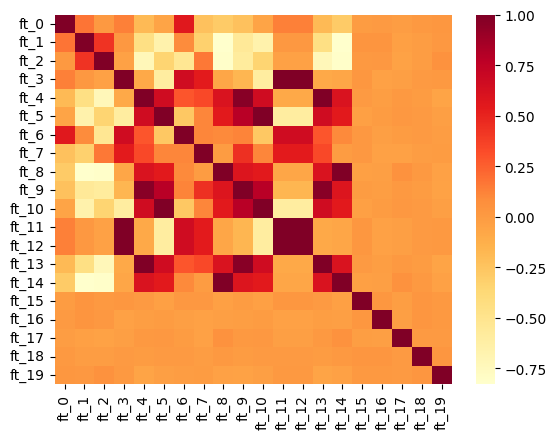

In [123]:
from sklearn.datasets import make_classification
dataset = datasets.make_classification(1000, 20, n_informative=5, n_redundant=5, n_repeated=5, n_classes=2, shuffle=False)


features, targets = dataset
df = pd.DataFrame(features, columns=[f'ft_{i}' for i in range(20)])
# df
sns.heatmap(df.corr(), cmap='YlOrRd')

In [121]:
#we import normalizer
from sklearn.preprocessing import MinMaxScaler
#initialize it
scaler = MinMaxScaler()
#calculate all the necessary data to perform the normalization
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_normalized['target'] = targets
df_normalized

from sklearn.feature_selection import VarianceThreshold
#we create a variance threshold object
sel = VarianceThreshold(threshold=0.0281)
#we apply the method to the data - this method does not create a new dataframe, just a numpy array
wine_variance_removed = sel.fit_transform(df_normalized)
#we can create a new dataframe using the get_feature_names_out() function to get the names of the selected columns
wine_dataframe_variance_removed = pd.DataFrame(wine_variance_removed, columns = sel.get_feature_names_out())
wine_dataframe_variance_removed

,ft_0,ft_2,ft_3,ft_10,ft_13,ft_15,target
0,0.615077,0.613003,0.799327,0.799327,0.613003,0.637116,0.0
1,0.607021,0.500917,0.795040,0.795040,0.500917,0.426930,0.0
2,0.519606,0.485687,0.844268,0.844268,0.485687,0.422920,0.0
3,0.447642,0.468166,0.619669,0.619669,0.468166,0.217933,0.0
4,0.721277,0.708431,0.434118,0.434118,0.708431,0.490727,0.0
...,...,...,...,...,...,...,...
995,0.543508,0.292592,0.370509,0.370509,0.292592,0.403558,1.0
996,0.396922,0.397024,0.702833,0.702833,0.397024,0.366262,1.0
997,0.630412,0.109805,0.346805,0.346805,0.109805,0.603661,1.0
998,0.370191,0.380920,0.672066,0.672066,0.380920,0.487530,1.0


In [124]:

selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(features, targets)
selected_indices = selector.get_support(indices=True)

# Print the indices of the selected features
print("Selected Feature Indices (SelectKBest):", selected_indices)


from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(n_estimators=100, random_state=42)
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(features, targets)
selected_indices = np.where(selector.support_)[0]

# Print the indices of the selected features
print("Selected Feature Indices (RFE with Random Forest):", selected_indices)

from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(random_state=42)
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(features, targets)
selected_indices = np.where(selector.support_)[0]

# Print the indices of the selected features
print("Selected Feature Indices (RFE with Decision Tree):", selected_indices)

Selected Feature Indices (SelectKBest): [ 2  5  8 10 14]
Selected Feature Indices (RFE with Random Forest): [ 2  5  8 10 14]
Selected Feature Indices (RFE with Decision Tree): [ 2  5  6  7 14]


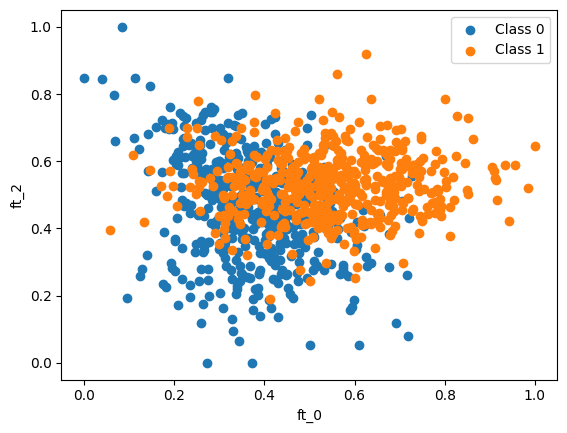

In [88]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

# object which will be used to score the current selection
estimator = DecisionTreeRegressor()

# object performing recursive feature selection
selector = RFE(estimator, n_features_to_select=5, step=1)

selector = selector.fit(df_normalized.iloc[:,:-1].values, df_normalized['target'])

selected_feature_indices = np.where(selector.support_)[0]
selected_features_with_target = df_normalized.iloc[:, selected_feature_indices]

for target_class in np.unique(targets):
    plt.scatter(selected_features_with_target.loc[targets == target_class, selected_features_with_target.columns[0]], 
                selected_features_with_target.loc[targets == target_class, selected_features_with_target.columns[1]], 
                label=f'Class {target_class}')
    

plt.xlabel(selected_features_with_target.columns[0])
plt.ylabel(selected_features_with_target.columns[1])
plt.legend()
plt.show()
